In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
import plotly.express as px

1- Visualisation globale :

In [189]:
# lecture du fichier csv
df = pd.read_csv("Dataset_Reponse_Marketing.csv")  

In [190]:
# Afficher toutes les lignes (par d√©faut : 10-60 selon env.)
pd.set_option('display.max_rows', None)

# Afficher toutes les colonnes (sinon il coupe avec ... aussi)
pd.set_option('display.max_columns', None)

# √âviter le raccourci dans les valeurs
pd.set_option('display.max_colwidth', None)

In [191]:
# Affichage des premi√®res lignes
df.head()

Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22  Homme          40124             16.518974                9   
1   32  Femme          26307             21.973535                8   
2   28  Femme          30040             26.762915                9   
3   16  Femme          15843             29.046008                9   
4   45  Homme          20225             21.479944                5   

   Reponse_campagne  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0

In [192]:
# Aper√ßu des informations du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   object 
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 112.6+ KB


In [193]:
# Aper√ßu des informations du dataset
df.describe(include='all')

Age   Sexe  Revenu_annuel  Temps_passe_sur_site  \
count   2400.000000   2400    2400.000000           2400.000000   
unique          NaN      2            NaN                   NaN   
top             NaN  Femme            NaN                   NaN   
freq            NaN   1238            NaN                   NaN   
mean      34.611250    NaN   26197.005000             22.073762   
std       10.087287    NaN    7062.015627              3.993837   
min       -1.000000    NaN    4422.000000              8.656394   
25%       28.000000    NaN   21414.250000             19.381206   
50%       35.000000    NaN   26222.000000             22.072839   
75%       42.000000    NaN   30909.250000             24.798229   
max       79.000000    NaN   50002.000000             37.769324   

        Achats_en_ligne  Reponse_campagne  
count       2400.000000       2400.000000  
unique              NaN               NaN  
top                 NaN               NaN  
freq                NaN               NaN  
mean           7.642083          0.526250  
std            1.612471          0.499415  
min            2.000000          0.000000  
25%            7.000000          0.000000  
50%            8.000000          1.000000  
75%            9.000000          1.000000  
max           13.000000          1.000000

In [194]:
# Nombre total de donn√©es manquantes
df.isnull().sum().sum()

np.int64(0)

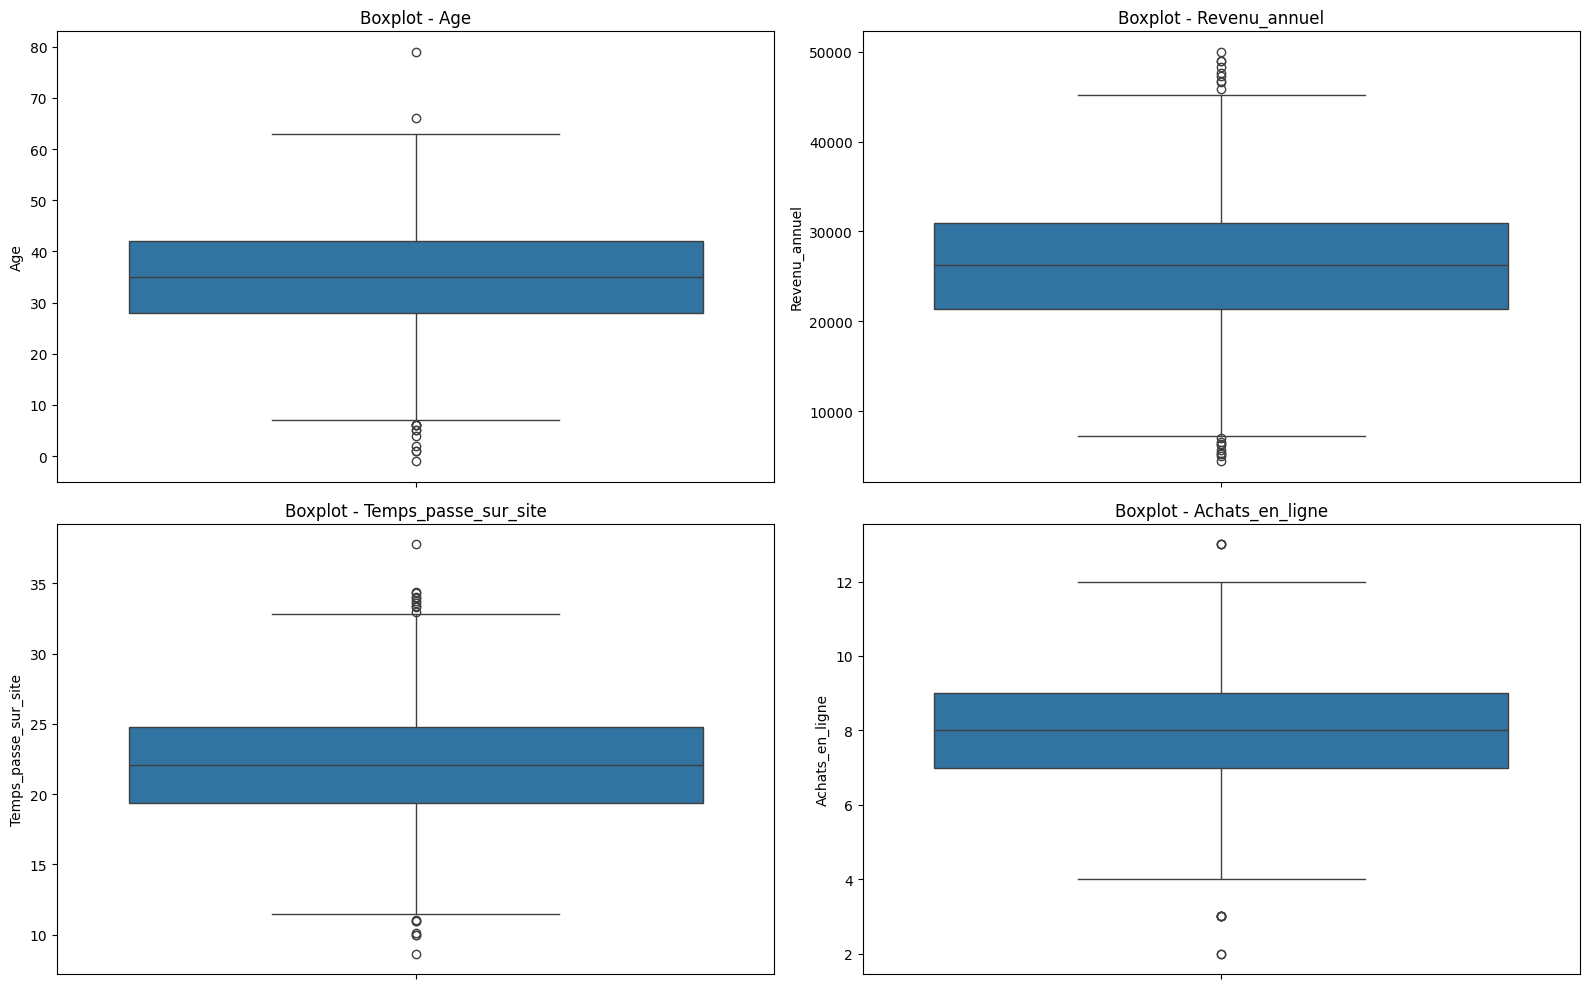

In [195]:
# Boxplots pour chaque variable num√©rique
plt.figure(figsize=(16, 10))
for i, col in enumerate(['Age', 'Revenu_annuel', 'Temps_passe_sur_site', 'Achats_en_ligne']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

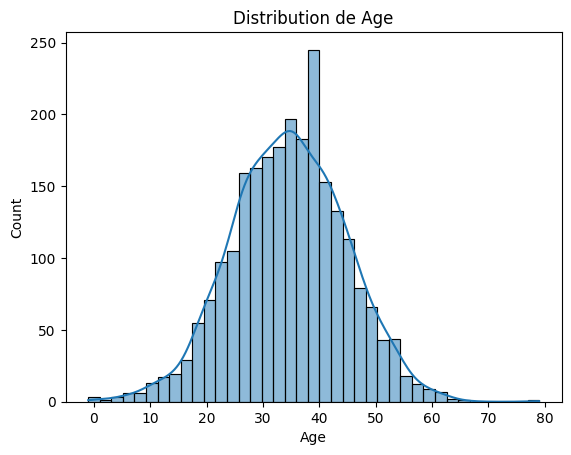

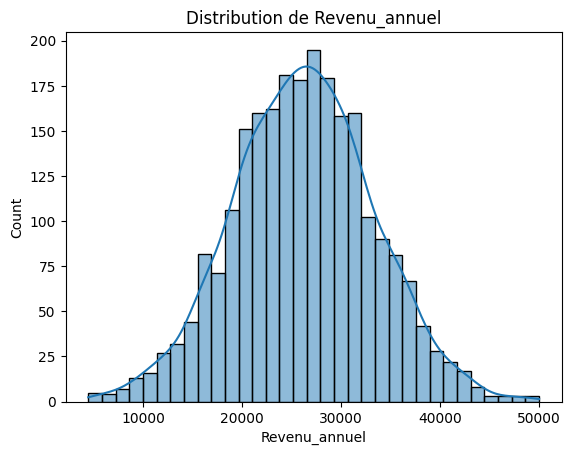

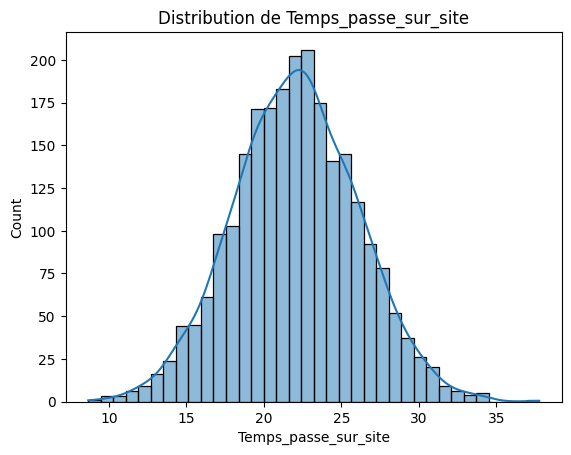

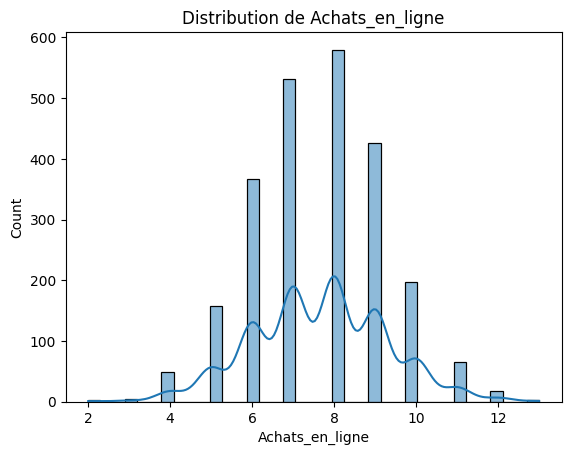

In [196]:
# Histogrammes
for col in ['Age', 'Revenu_annuel', 'Temps_passe_sur_site', 'Achats_en_ligne']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

üìä R√©partition du sexe :
Sexe
Femme    1238
Homme    1162
Name: count, dtype: int64


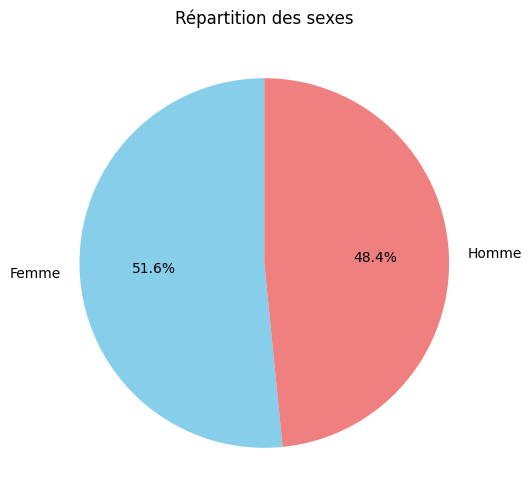

In [197]:
# Compter le nombre d'hommes et de femmes
repartition_sexe = df['Sexe'].value_counts()

# Affichage
print("üìä R√©partition du sexe :")
print(repartition_sexe)

# Visualisation avec un camembert
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
repartition_sexe.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("R√©partition des sexes")
plt.ylabel('')  # Supprimer le label y
plt.show()

üìä Nombre de r√©ponses √† la campagne :
‚úÖ A r√©pondu : 1263
‚ùå N'a pas r√©pondu : 1137


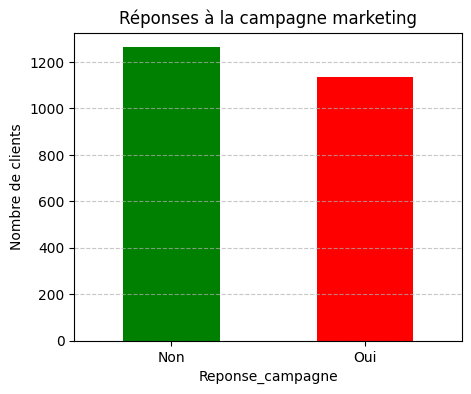

In [198]:
# Compter les r√©ponses (1 = r√©pondu, 0 = pas r√©pondu)
reponse_campagne = df['Reponse_campagne'].value_counts()

# Affichage
print("üìä Nombre de r√©ponses √† la campagne :")
print(f"‚úÖ A r√©pondu : {reponse_campagne.get(1, 0)}")
print(f"‚ùå N'a pas r√©pondu : {reponse_campagne.get(0, 0)}")

# Visualisation en barres
plt.figure(figsize=(5, 4))
reponse_campagne.plot(kind='bar', color=['green', 'red'])
plt.title("R√©ponses √† la campagne marketing")
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2- Gestion des outliers et d√©cisions : 

Pour rester coh√©rent avec le but d'un site d'e-commerce, je choisis de supprimer les donn√©es qui sont tr√®s petits et peuvent pas avoir un revenu ni acheter des produits en ligne sans aide et √©galement les personnes trop ag√©s.

Reste √† faire des choix selon le nombre de donn√©es et l'incoh√©rence.


In [199]:
print(df[(df['Age'] > 65)])


      Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
568    66  Femme          23520             24.884647                7   
1499   79  Homme          28376             19.049495                8   

      Reponse_campagne  
568                  1  
1499                 0  


In [200]:
print(df[(df['Age'] < 16)])

      Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
111    13  Homme          27676             24.669532                8   
145    15  Homme          11859             25.786194                8   
151    12  Homme          27597             25.194020                7   
225    15  Femme          26562             24.180564                7   
237     1  Homme          28120             22.971610                8   
260    13  Homme          36368             18.455549                8   
298    15  Homme          30543             20.874160                9   
308    11  Femme          42578             31.704342               12   
310     2  Femme          14211             24.493669                6   
351    15  Homme          34893             11.874280                5   
371     6  Homme          31272             19.580502                8   
386    11  Femme          19812             20.240587                6   
403    10  Femme          25684       

In [201]:
nombre_moins_16 = df[df['Age'] < 16].shape[0]
print(f"Nombre de personnes avec un √¢ge < 16 ans : {nombre_moins_16}")

nombre_moins_14 = df[df['Age'] < 14].shape[0]
print(f"Nombre de personnes avec un √¢ge < 14 ans : {nombre_moins_14}")

nombre_moins_12 = df[df['Age'] < 12].shape[0]
print(f"Nombre de personnes avec un √¢ge < 12 ans : {nombre_moins_12}")

nombre_moins_10 = df[df['Age'] < 10].shape[0]
print(f"Nombre de personnes avec un √¢ge < 10 ans : {nombre_moins_10}")

Nombre de personnes avec un √¢ge < 16 ans : 68
Nombre de personnes avec un √¢ge < 14 ans : 49
Nombre de personnes avec un √¢ge < 12 ans : 32
Nombre de personnes avec un √¢ge < 10 ans : 19


In [202]:
# Nombre total d'observations dans le dataset
nb_total = df.shape[0]

# Pourcentage
pourcentage_16 = (nombre_moins_16 / nb_total) * 100

# Affichage propre
print(f"üìä Il y a {nombre_moins_16} personnes sur {nb_total} (soit {pourcentage_16:.2f}%) ayant moins de 16 ans.")


üìä Il y a 68 personnes sur 2400 (soit 2.83%) ayant moins de 16 ans.


In [203]:
# Suppression des outliers dans la colonne Age (moins de 16 ans ou plus de 70 ans)
df_cleaned = df[(df['Age'] >= 16) & (df['Age'] <= 70)].copy()

# V√©rification : combien de lignes restantes ?
print(f"Nombre de lignes apr√®s suppression : {df_cleaned.shape[0]} (sur {nb_total} initiales)")


Nombre de lignes apr√®s suppression : 2331 (sur 2400 initiales)


3- Gestion des variables cat√©gorielles

Puisque la colonne Sexe est de type binaire du coup on encode avec label encoder en donnant 0 pour Femme et 1 pour Homme selon l'ordre alphab√©tique.



In [204]:
# Encodage de la variable Sexe
le = LabelEncoder()
df_cleaned['Sexe'] = le.fit_transform(df_cleaned['Sexe'])

In [205]:
df_cleaned.head()

Age  Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22     1          40124             16.518974                9   
1   32     0          26307             21.973535                8   
2   28     0          30040             26.762915                9   
3   16     0          15843             29.046008                9   
4   45     1          20225             21.479944                5   

   Reponse_campagne  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0

4- coor√©lation des donn√©es


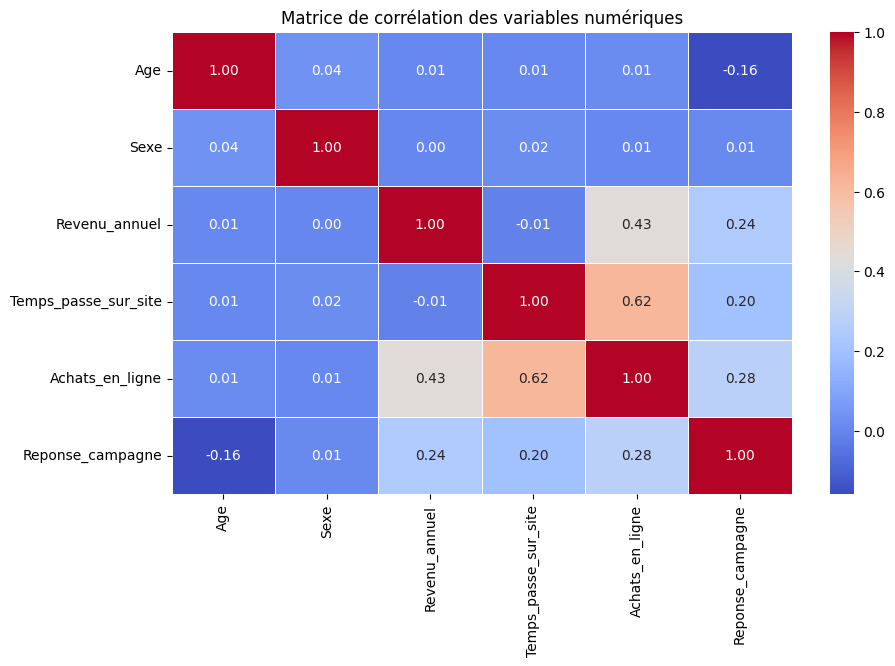

In [206]:
# Calcul et affichage de la matrice de corr√©lation
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation des variables num√©riques")
plt.show()

5- Normalisation des donn√©es et s√©paration  : 

In [207]:
problem = df_cleaned.drop("Reponse_campagne", axis=1)
solution = df_cleaned["Reponse_campagne"]

In [208]:
# Normalisation


numerical_features = ['Age', 'Revenu_annuel', 'Temps_passe_sur_site', 'Achats_en_ligne']
categorical_features = ['Sexe']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(problem[numerical_features])


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, solution, random_state=18)

6-PCA

La colonne "Sexe" est une variable cat√©gorielle, m√™me si elle a √©t√© encod√©e en 0/1, ce n‚Äôest pas une variable num√©rique continue, et donc elle ne doit pas √™tre trait√©e comme telle dans une analyse de variance comme la PCA.


On utilise la PCA ici que pour un interet de visualisation car on n'a ni beaucoup de donn√©es ni une forte coor√©lation.

In [210]:
pca_object = PCA()
principal_component_problem = pca_object.fit_transform(X_scaled)
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

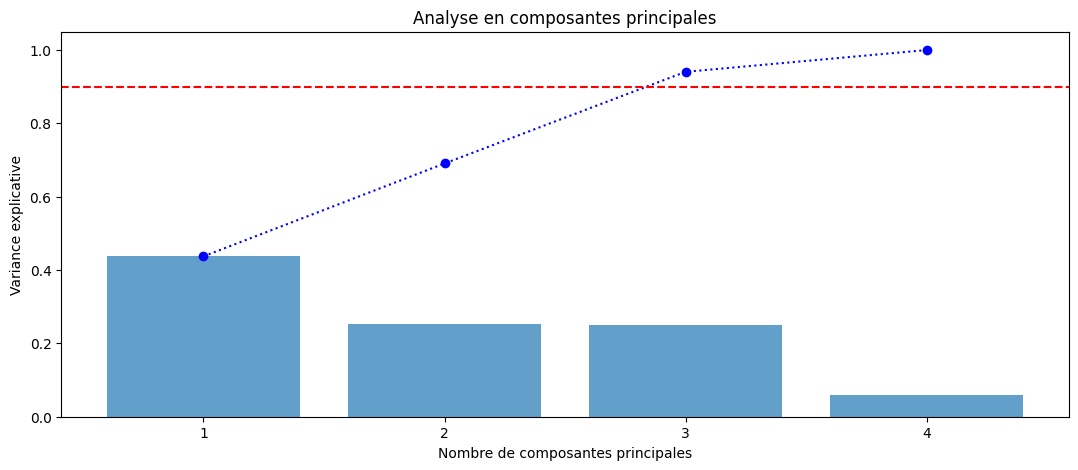

In [211]:
plt.figure(figsize=(13, 5))
plt.xticks(ticks=range(1, 5))
plt.bar(range(1,len(cumulative_variance) + 1), explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1), cumulative_variance, "bo:", label='cumulative_variance')
plt.axhline(y=0.9, color="red", linestyle="--", label="90 % d'information utile")
plt.title("Analyse en composantes principales")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance explicative")
plt.show()

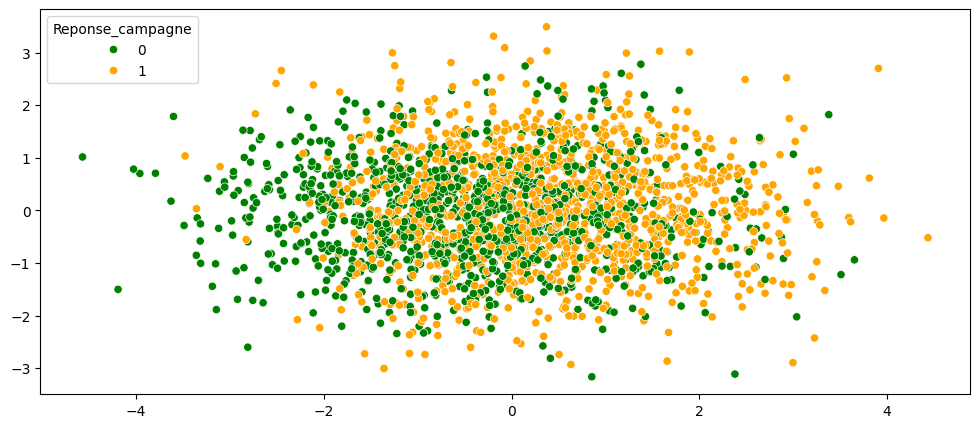

In [212]:
plt.figure(figsize=(12,5))
custom_palette = {0 : "green", 1:"orange"}
sns.scatterplot(x=principal_component_problem[:, 0], y=principal_component_problem[:,1], hue=solution, palette=custom_palette)
plt.show()

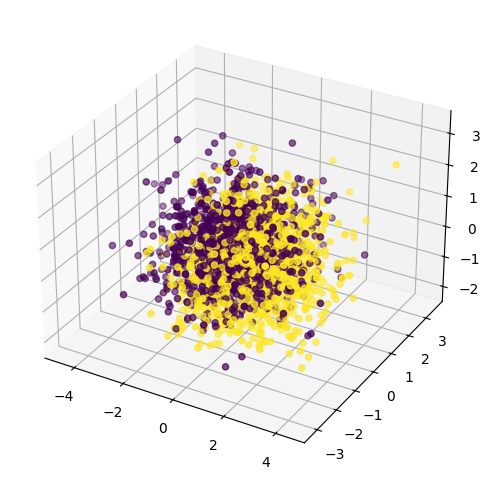

In [213]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(projection="3d")
ax.scatter(principal_component_problem[:, 0], principal_component_problem[:, 1], principal_component_problem[:, 2], c=solution)
plt.show()

7- Mod√©lisation : R√©gression Logistique (sans et avec pca)

In [214]:
# Cr√©ation du mod√®le
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Pr√©dictions sur les donn√©es de test
y_pred = log_model.predict(X_test)

In [215]:
# √âvaluation des performances
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("√âvaluation de la R√©gression Logistique :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred))

√âvaluation de la R√©gression Logistique :
Accuracy  : 0.626
Precision : 0.629
Recall    : 0.691
F1-score  : 0.658

Classification Report :

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       279
           1       0.63      0.69      0.66       304

    accuracy                           0.63       583
   macro avg       0.63      0.62      0.62       583
weighted avg       0.63      0.63      0.62       583



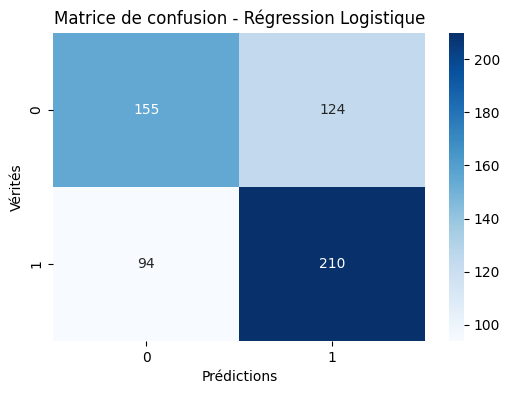

In [216]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("Matrice de confusion - R√©gression Logistique")
plt.show()

√âvaluation de la R√©gression Logistique apr√®s PCA :
Accuracy  : 0.608
Precision : 0.623
Recall    : 0.665
F1-score  : 0.643

Classification Report :

              precision    recall  f1-score   support

           0       0.59      0.54      0.57       219
           1       0.62      0.67      0.64       248

    accuracy                           0.61       467
   macro avg       0.61      0.60      0.60       467
weighted avg       0.61      0.61      0.61       467



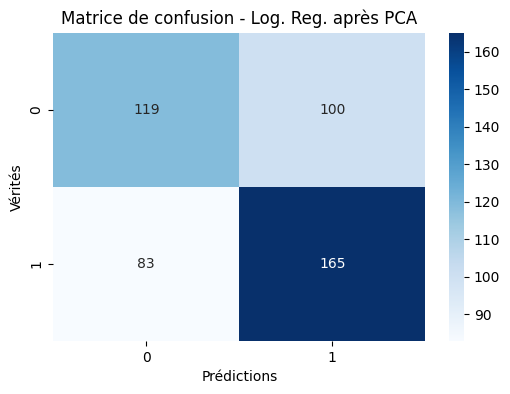

In [217]:
# Comparaison avec pca en prenant les 3 premi√®res composantes principales
X_pca = principal_component_problem[:, :3]

# S√©paration train/test dans l'espace r√©duit
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, solution, test_size=0.2, random_state=18)

# Cr√©ation et entra√Ænement du mod√®le
log_model_pca = LogisticRegression()
log_model_pca.fit(X_train_pca, y_train_pca)

# Pr√©dictions
y_pred_pca = log_model_pca.predict(X_test_pca)

# √âvaluation
accuracy = accuracy_score(y_test_pca, y_pred_pca)
precision = precision_score(y_test_pca, y_pred_pca)
recall = recall_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)

print("√âvaluation de la R√©gression Logistique apr√®s PCA :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test_pca, y_pred_pca))

# Matrice de confusion
cm = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("Matrice de confusion - Log. Reg. apr√®s PCA")
plt.show()

8- Mod√©lisation KNN : ( comme vu en cours)

In [218]:
#GridSearchCV pour trouver le meilleur k

# Recherche du meilleur k avec validation crois√©e (f1_macro)
def get_optimal_k_value(X_scaled, solution):
    parameters = {"n_neighbors": np.arange(1, 52, 2)}
    grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1_macro")
    grid_search.fit(X_scaled, solution)
    
    print("Meilleur k trouv√© :", grid_search.best_params_)
    
    best_model = grid_search.best_estimator_
    scores = pd.DataFrame(grid_search.cv_results_)
    
    return best_model, scores

# Lancer la recherche du meilleur k
best_knn_model, knn_scores = get_optimal_k_value(X_scaled, solution)

Meilleur k trouv√© : {'n_neighbors': np.int64(51)}


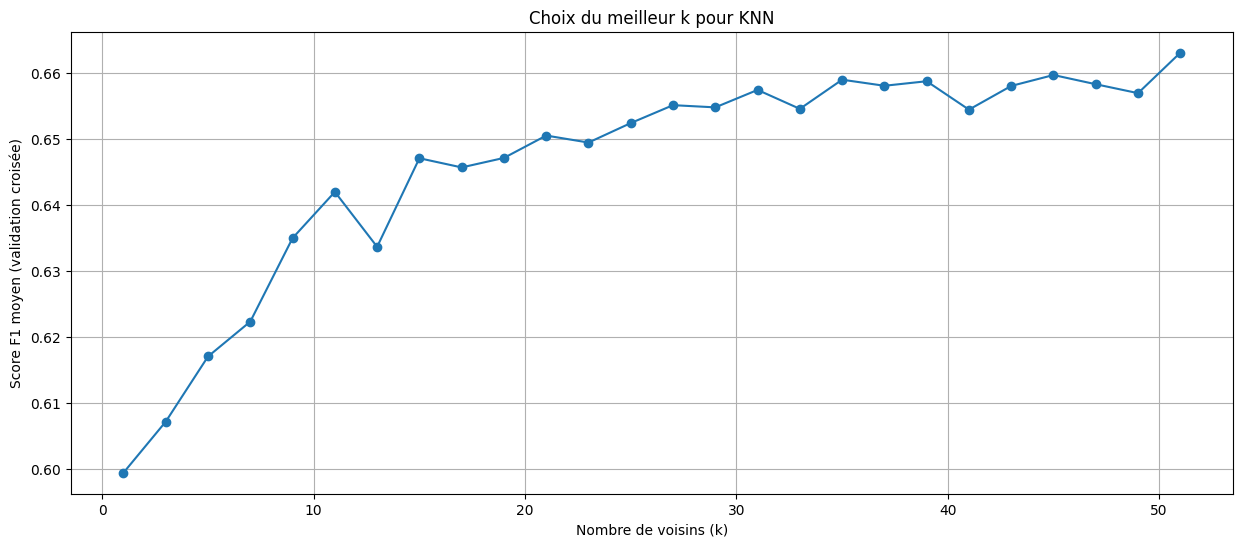

In [219]:
# Affichage du score moyen selon k

plt.figure(figsize=(15, 6))
plt.plot(knn_scores["param_n_neighbors"], knn_scores["mean_test_score"], marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Score F1 moyen (validation crois√©e)")
plt.title("Choix du meilleur k pour KNN")
plt.grid(True)
plt.show()


In [220]:
# Entra√Ænement et analyse des voisins pour un point de test

# R√©-entra√Ænement du meilleur KNN trouv√© sur X_train
knn = KNeighborsClassifier(n_neighbors=best_knn_model.n_neighbors)
knn.fit(X_train, y_train)

# Afficher les voisins les plus proches d'un exemple de test
test_index = 199  # tu peux changer ce chiffre pour tester d'autres points
distances, indices = knn.kneighbors([X_test[test_index]])

print("Distances aux voisins :")
print(distances[0])

print("Indices des voisins :")
print(indices[0])

print("Labels des voisins :")
for idx in indices[0]:
    print(f"Index {idx} -> Classe : {y_train.iloc[idx]}")


Distances aux voisins :
[0.18431668 0.24412111 0.27671295 0.34189797 0.38162384 0.38980493
 0.39936183 0.4262265  0.44220301 0.45168446 0.49231109 0.53394533
 0.53510422 0.53606822 0.56972166 0.62333787 0.63698225 0.64245332
 0.65838349 0.68868463 0.69291975 0.70069751 0.70070725 0.70202594
 0.71201682 0.71876169 0.72252342 0.73031708 0.73266658 0.73781877
 0.73856696 0.7397842  0.74205079 0.74894546 0.76308053 0.76420346
 0.76536083 0.76721332 0.76997136 0.77090172 0.77270735 0.77511465
 0.78116583 0.78455656 0.78574353 0.78645549 0.7928352  0.7990344
 0.80263866 0.80281579 0.80375889]
Indices des voisins :
[ 808 1219 1678  432 1004 1044  221  467  108 1351  958  163  425 1147
  401  731  854  338 1078  661  982 1155 1519  399  196  764   50  724
  655   90 1237  389 1643 1256  136 1651 1020  778 1109  250  195  503
  813   48  863  554 1005  315 1581  841  488]
Labels des voisins :
Index 808 -> Classe : 1
Index 1219 -> Classe : 0
Index 1678 -> Classe : 1
Index 432 -> Classe : 0
Index

√âvaluation du KNN :
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       279
           1       0.65      0.71      0.68       304

    accuracy                           0.65       583
   macro avg       0.65      0.64      0.64       583
weighted avg       0.65      0.65      0.64       583



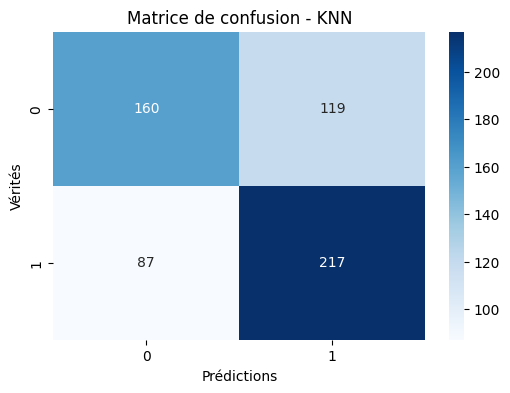

In [221]:
# √âvaluation du mod√®le KNN sur l‚Äôensemble X_test

from sklearn.metrics import classification_report, confusion_matrix

# Pr√©dictions
y_pred_knn = knn.predict(X_test)

# √âvaluation
print("√âvaluation du KNN :")
print(classification_report(y_test, y_pred_knn))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("Matrice de confusion - KNN")
plt.show()


### üß† Analyse du mod√®le KNN

- Le `GridSearchCV` a permis de d√©terminer que le meilleur nombre de voisins `k` est **51**, avec un **score F1 macro optimal**.
- La **courbe des scores** montre que les performances se stabilisent autour de ce `k`.
- En analysant un exemple de test, on observe que la **majorit√© de ses voisins** appartiennent √† la classe pr√©dite, ce qui confirme la logique de d√©cision du mod√®le.
- Le mod√®le a obtenu des **scores int√©ressants** (accuracy, recall, precision, F1) mais reste l√©g√®rement en retrait par rapport √† la r√©gression logistique dans notre cas.

### ‚úÖ Avantages :
- Facile √† comprendre et √† impl√©menter.
- Ne n√©cessite pas d‚Äôapprentissage r√©el (lazy learner).
- Donne des r√©sultats raisonnables quand les classes sont bien s√©par√©es.

### ‚ö†Ô∏è Limites :
- Sensible √† la normalisation (d‚Äôo√π l‚Äôimportance de la `StandardScaler`).
- Performances qui chutent si les donn√©es sont trop dispers√©es ou bruit√©es.
- Co√ªteux en calcul si le jeu de donn√©es est tr√®s grand.

### üéØ Conclusion :
- KNN est un bon point de comparaison.
- Dans notre cas, la **r√©gression logistique semble plus robuste**, mais KNN reste utile √† interpr√©ter visuellement.


9- Mod√©lisation arbre de d√©cision : 

üå≥ √âvaluation du mod√®le Arbre de D√©cision :
Accuracy  : 0.617
Precision : 0.635
Recall    : 0.625
F1-score  : 0.630

Classification Report :

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       279
           1       0.64      0.62      0.63       304

    accuracy                           0.62       583
   macro avg       0.62      0.62      0.62       583
weighted avg       0.62      0.62      0.62       583



c:\EXERCICES\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


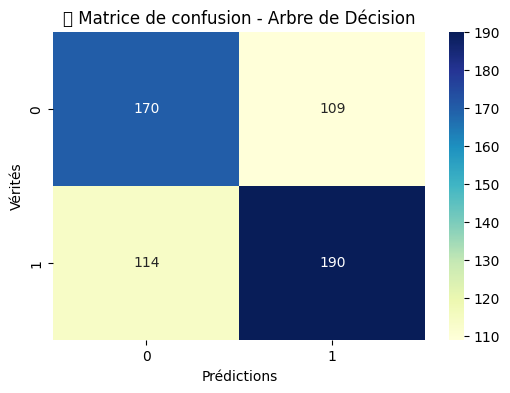

In [222]:
# Cr√©ation du mod√®le sans r√©glage sp√©cifique (on en fera plus avec GridSearch plus tard)
tree_model = DecisionTreeClassifier(random_state=18)
tree_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_tree = tree_model.predict(X_test)

# √âvaluation des performances
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

print("üå≥ √âvaluation du mod√®le Arbre de D√©cision :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_tree))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("üå≥ Matrice de confusion - Arbre de D√©cision")
plt.show()


In [223]:
# D√©finition de la grille d‚Äôhyperparam√®tres
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cr√©ation du mod√®le de base
tree = DecisionTreeClassifier(random_state=18)

# Cr√©ation de la recherche par grille
grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1  # utilise tous les c≈ìurs disponibles
)

# Ex√©cution du GridSearch
grid_search_tree.fit(X_train, y_train)

# Affichage des meilleurs hyperparam√®tres
print("üåü Meilleurs param√®tres trouv√©s :")
print(grid_search_tree.best_params_)

# Utiliser le meilleur mod√®le trouv√©
best_tree_model = grid_search_tree.best_estimator_


üåü Meilleurs param√®tres trouv√©s :
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


üìà √âvaluation du meilleur Arbre de D√©cision (optimis√©) :
Accuracy  : 0.662
Precision : 0.689
Recall    : 0.641
F1-score  : 0.664

Classification Report :

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       279
           1       0.69      0.64      0.66       304

    accuracy                           0.66       583
   macro avg       0.66      0.66      0.66       583
weighted avg       0.66      0.66      0.66       583



c:\EXERCICES\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


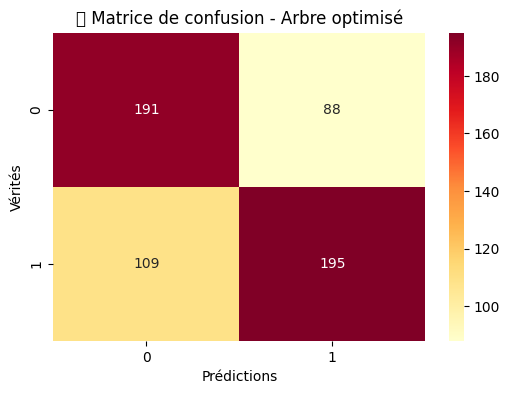

In [224]:
# Pr√©dictions avec le meilleur mod√®le
y_pred_best_tree = best_tree_model.predict(X_test)

# √âvaluation
accuracy = accuracy_score(y_test, y_pred_best_tree)
precision = precision_score(y_test, y_pred_best_tree)
recall = recall_score(y_test, y_pred_best_tree)
f1 = f1_score(y_test, y_pred_best_tree)

print("üìà √âvaluation du meilleur Arbre de D√©cision (optimis√©) :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_best_tree))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlOrRd", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("üåü Matrice de confusion - Arbre optimis√©")
plt.show()


10- Mod√©lisation randomforrest : 

üå≤ √âvaluation du mod√®le Random Forest :
Accuracy  : 0.655
Precision : 0.665
Recall    : 0.684
F1-score  : 0.674

Classification Report :

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       279
           1       0.66      0.68      0.67       304

    accuracy                           0.66       583
   macro avg       0.65      0.65      0.65       583
weighted avg       0.65      0.66      0.65       583



c:\EXERCICES\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


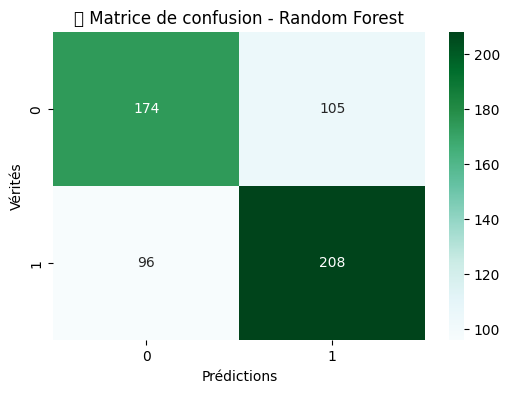

In [225]:
# Cr√©ation et entra√Ænement du mod√®le
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_rf = rf_model.predict(X_test)

# √âvaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("üå≤ √âvaluation du mod√®le Random Forest :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="BuGn", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("üå≤ Matrice de confusion - Random Forest")
plt.show()


In [226]:

# D√©finir la grille d'hyperparam√®tres
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Cr√©er le mod√®le de base
rf = RandomForestClassifier(random_state=18)

# Cr√©ation du GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Entra√Ænement
grid_search_rf.fit(X_train, y_train)

# Affichage des meilleurs hyperparam√®tres
print("üåü Meilleurs param√®tres Random Forest :")
print(grid_search_rf.best_params_)

# R√©cup√©rer le meilleur mod√®le
best_rf_model = grid_search_rf.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
üåü Meilleurs param√®tres Random Forest :
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


üìà √âvaluation du meilleur mod√®le Random Forest :
Accuracy  : 0.662
Precision : 0.671
Recall    : 0.691
F1-score  : 0.681

Classification Report :

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       279
           1       0.67      0.69      0.68       304

    accuracy                           0.66       583
   macro avg       0.66      0.66      0.66       583
weighted avg       0.66      0.66      0.66       583



c:\EXERCICES\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


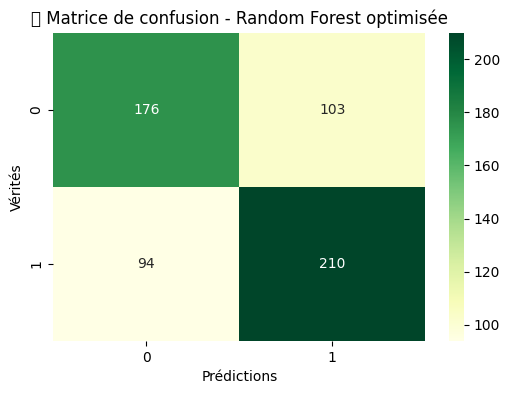

In [227]:
# Pr√©dictions
y_pred_best_rf = best_rf_model.predict(X_test)

# √âvaluation
accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

print("üìà √âvaluation du meilleur mod√®le Random Forest :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_best_rf))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGn", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("üåü Matrice de confusion - Random Forest optimis√©e")
plt.show()


11- Mod√©lisation Xgboost :

üöÄ √âvaluation du mod√®le XGBoost :
Accuracy  : 0.645
Precision : 0.657
Recall    : 0.668
F1-score  : 0.662

Classification Report :

              precision    recall  f1-score   support

           0       0.63      0.62      0.63       279
           1       0.66      0.67      0.66       304

    accuracy                           0.64       583
   macro avg       0.64      0.64      0.64       583
weighted avg       0.64      0.64      0.64       583



c:\EXERCICES\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\EXERCICES\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


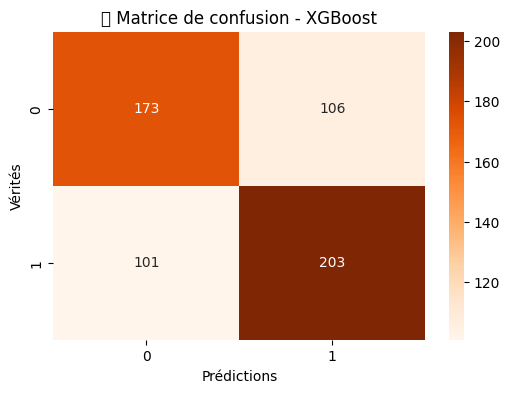

In [228]:
# Cr√©ation du mod√®le XGBoost de base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=18)
xgb_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_xgb = xgb_model.predict(X_test)

# √âvaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("üöÄ √âvaluation du mod√®le XGBoost :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-score  : {f1:.3f}")
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.title("üöÄ Matrice de confusion - XGBoost")
plt.show()


12- comparaison des mod√®les : 

M√™me si le jeu de donn√©es n‚Äôest pas fortement d√©s√©quilibr√© (52.6% de non-r√©ponses contre 47.4% de r√©ponses), nous avons utilis√© le F1-score pour √©valuer les performances des mod√®les. Cela permet de prendre en compte √† la fois la pr√©cision et le rappel, deux m√©triques importantes pour un projet de pr√©diction de r√©ponse marketing.


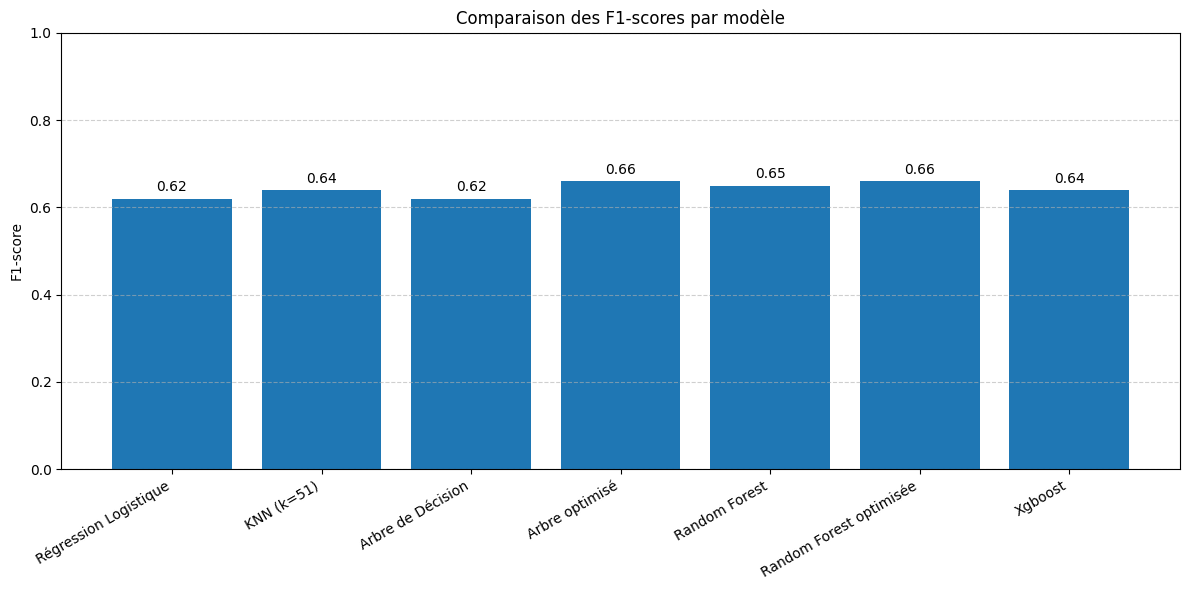

In [229]:
# Remplace ces valeurs par tes vrais r√©sultats du notebook
models = [
    "R√©gression Logistique",
    "KNN (k=51)",
    "Arbre de D√©cision",
    "Arbre optimis√©",
    "Random Forest",
    "Random Forest optimis√©e",
    "Xgboost"
]

f1_scores = [
    0.62,  
    0.64,  
    0.62,  
    0.66,  
    0.65,  
    0.66,
    0.64  
]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, f1_scores)
plt.title("Comparaison des F1-scores par mod√®le")
plt.ylabel("F1-score")
plt.ylim(0, 1)

# Ajouter les scores sur les barres
for bar, score in zip(bars, f1_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### üß† Conclusion et analyse critique

Nous avons compar√© plusieurs mod√®les de classification afin de pr√©dire la r√©ponse √† une campagne marketing. Les performances ont √©t√© √©valu√©es √† l'aide du **F1-score macro** pour tenir compte de l'√©quilibre entre les deux classes.

#### üìä Synth√®se des r√©sultats :
- Le mod√®le **d'Arbre de D√©cision optimis√©** et la **Random Forest optimis√©e** ont obtenu les meilleurs r√©sultats avec un **F1-score de 0.66**.
- Le mod√®le **XGBoost**, malgr√© sa r√©putation, n'a pas surpass√© ces deux mod√®les dans ce cas pr√©cis.
- La **r√©gression logistique** et l‚Äô**arbre non optimis√©** ferment la marche avec un score de **0.62**, ce qui reste correct mais perfectible.

#### ‚ö†Ô∏è Limites identifi√©es :
- Le dataset pr√©sente **tr√®s peu de variables explicatives (5 colonnes seulement)**.
- Les **corr√©lations entre les variables d'entr√©e et la variable cible sont faibles**, ce qui rend la t√¢che de classification difficile.
- Il manque des **donn√©es discriminantes** li√©es aux comportements r√©els des clients (historique d‚Äôachat, interactions avec la marque, anciennet√©, etc.).

#### üîÅ Pistes d'am√©lioration :
- **Ajouter plus de variables pertinentes** : ex. fr√©quence d‚Äôachat, canal de communication pr√©f√©r√©, scoring client, etc.
- **Faire du feature engineering** pour extraire de nouvelles colonnes √† partir des donn√©es existantes (groupes d'√¢ge, tranches de revenu...).
- Tester des techniques d'√©quilibrage des classes comme **SMOTE** si d√©s√©quilibre important.
- Refaire l‚Äôanalyse avec un **dataset enrichi** et/ou crois√© avec d‚Äôautres sources (CRM, web analytics...).

#### üéØ Conclusion finale :
Le projet a permis de d√©montrer que les mod√®les de classification peuvent d√©tecter une certaine logique dans les r√©ponses clients, **mais la qualit√© des r√©sultats est limit√©e par la faiblesse des donn√©es disponibles**.  
Les meilleurs scores (F1 ‚âà 0.66) montrent que les mod√®les sont capables de capter un signal, mais **ce n‚Äôest pas encore suffisant pour une application en production sans am√©lioration des donn√©es**.

Un futur travail devrait se concentrer sur **l‚Äôenrichissement du dataset**, bien plus que sur la complexit√© des mod√®les.
